# Nome: Ives Jundi Chiba
# RM: 553243

# Objetivo: Tentar prever o tamanho de um penguim com base nas suas características. Essa pesquisa pode ser útil visando a pesquisa e a conservação da espécie. Além de como zoológicos podem fornecer os cuidados adequados ao animal.

# Descrição dos dados:
- Origem: Kaggle (https://www.kaggle.com/datasets/amulyas/penguin-size-dataset)
- Nome: Penguin Sizes Dataset
- Tamanho: 3kB
- Quantidade de Registros: 1670
- Linhas x Colunas: 334 x 5
- Dados Faltantes: 18


# Descrever o pré-processamento realizado no conjunto de dados (Feature engineering)
- Padronização: https://colab.research.google.com/drive/1A0X9DwbYZhPCwS980tA0BiRhW34PROCL#scrollTo=vU8kNwQYZTWm&line=1&uniqifier=1
- Exclusão das linhas que continham "NaN"

# Classification Report:
- A variável "massa" tem uma correlação positiva forte com a variável "comprimento do bico". Isso significa que, em geral, pinguins com massa maior também tendem a ter bicos mais longos.
- A variável "massa" tem uma correlação positiva moderada com a variável "altura". Isso significa que, em geral, pinguins com massa maior tendem a ser um pouco mais altos do que pinguins com massa menor.
- A variável "massa" tem uma correlação positiva fraca com a variável "comprimento da asa". Isso significa que, em geral, pinguins com massa maior tendem a ter asas um pouco mais longas do que pinguins com massa menor.
- Não há correlação linear significativa entre a variável "massa" e a variável "espécie". Isso significa que não há uma relação clara entre a massa do pinguim e sua espécie.
- A variável "comprimento do bico" tem uma correlação positiva moderada com a variável "altura". Isso significa que, em geral, pinguins com bicos mais longos também tendem a ser um pouco mais altos.
- A variável "comprimento do bico" tem uma correlação positiva fraca com a variável "comprimento da asa". Isso significa que, em geral, pinguins com bicos mais longos também tendem a ter asas um pouco mais longas.
- Não há correlação linear significativa entre a variável "comprimento do bico" e a variável "espécie". Isso significa que não há uma relação clara entre o comprimento do bico do pinguim e sua espécie.
- A variável "altura" tem uma correlação positiva fraca com a variável "comprimento da asa". Isso significa que, em geral, pinguins mais altos também tendem a ter asas um pouco mais longas.
- Não há correlação linear significativa entre a variável "altura" e a variável "espécie". Isso significa que não há uma relação clara entre a altura do pinguim e sua espécie.
- Não há correlação linear significativa entre a variável "comprimento da asa" e a variável "espécie". Isso significa que não há uma relação clara entre o comprimento da asa do pinguim e sua espécie.

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
path_dataset = '/content/drive/MyDrive/dados_cp/penguins_size.csv'

In [94]:
dados = pd.read_csv(path_dataset, sep=',')

In [95]:
# Número de linhas e colunas
num_linhas, num_colunas = dados.shape

print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 344
Número de colunas: 7


In [96]:
# Dados Faltantes
ocorrencias_na = dados.isna().sum().sum()
print(ocorrencias_na)

18


In [97]:
dados.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [98]:
dados.dropna(inplace=True)

In [99]:
dados["culmen_length_mm"].mean(), dados["culmen_depth_mm"].mean(), dados["flipper_length_mm"].mean(), dados["body_mass_g"].mean()

(43.99431137724551, 17.16047904191617, 201.01497005988023, 4209.056886227545)

In [100]:
dados["culmen_length_mm"].median(), dados["culmen_depth_mm"].median(), dados["flipper_length_mm"].median(), dados["body_mass_g"].median()

(44.5, 17.3, 197.0, 4050.0)

# 1 - Alterando os nomes das colunas
(Não era necessário pois o dataset já apresenta os nomes no formato correto)

In [101]:
dados.columns = dados.columns.str.replace(" ", "_")

In [102]:
new_columns = [
    new_name.replace(' ', '_').lower()
    for new_name in dados.columns
    ]

In [103]:
new_columns

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [104]:
dados.columns = new_columns

In [105]:
dados.columns = dados.apply(lambda x: str.lower(x.name.replace(" ", "_")))

In [106]:
dados

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [107]:
dados = dados[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "species"]]
dados.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


# 2 - Separando os dados

In [108]:
x = dados.drop(columns=['species'])

In [109]:
y = dados['species']
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

# 3 - Dividir os dados em conjuntos de treinamento e teste: 80% para treinamento e 20% para teste

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
x_train.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
230,40.9,13.7,214.0,4650.0
84,37.3,17.8,191.0,3350.0
303,50.0,15.9,224.0,5350.0
22,35.9,19.2,189.0,3800.0
29,40.5,18.9,180.0,3950.0


In [113]:
y_train.head(5)

230    Gentoo
84     Adelie
303    Gentoo
22     Adelie
29     Adelie
Name: species, dtype: object

# Modelo 1: Regressão Logística

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

In [127]:
# Padronização
x_train = scaler.fit_transform(x_train)

In [128]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [129]:
y_predicoes = lda.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [131]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=(['Adelie','Chinstrap', 'Gentoo']))

In [132]:
y_predicoes = lda.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [133]:
y_predicoes

array(['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo'], dtype='<U9')

In [134]:
lda_cm = confusion_matrix(y_test, y_predicoes)

<Figure size 1500x500 with 0 Axes>

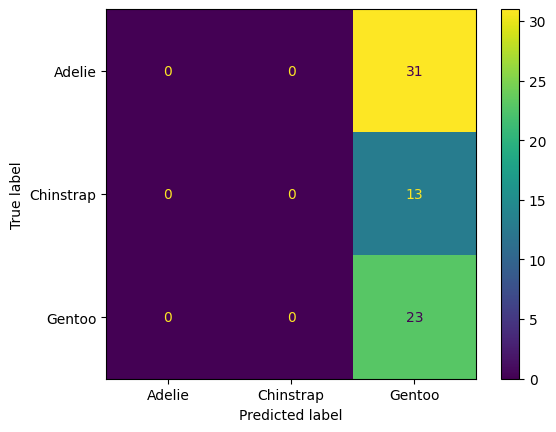

In [135]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['Adelie','Chinstrap', 'Gentoo'])

disp.plot(values_format='d')

In [136]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.34328358208955223

In [137]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00        31
   Chinstrap       0.00      0.00      0.00        13
      Gentoo       0.34      1.00      0.51        23

    accuracy                           0.34        67
   macro avg       0.11      0.33      0.17        67
weighted avg       0.12      0.34      0.18        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modelo 2: Support Vector Machine (SVM)

In [138]:
from sklearn.svm import SVC

In [139]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [140]:
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [141]:
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.4626865671641791


# Modelo 3: Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
random_forest_predictions = random_forest_model.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_cm = confusion_matrix(y_test, random_forest_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [145]:
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.19402985074626866


In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

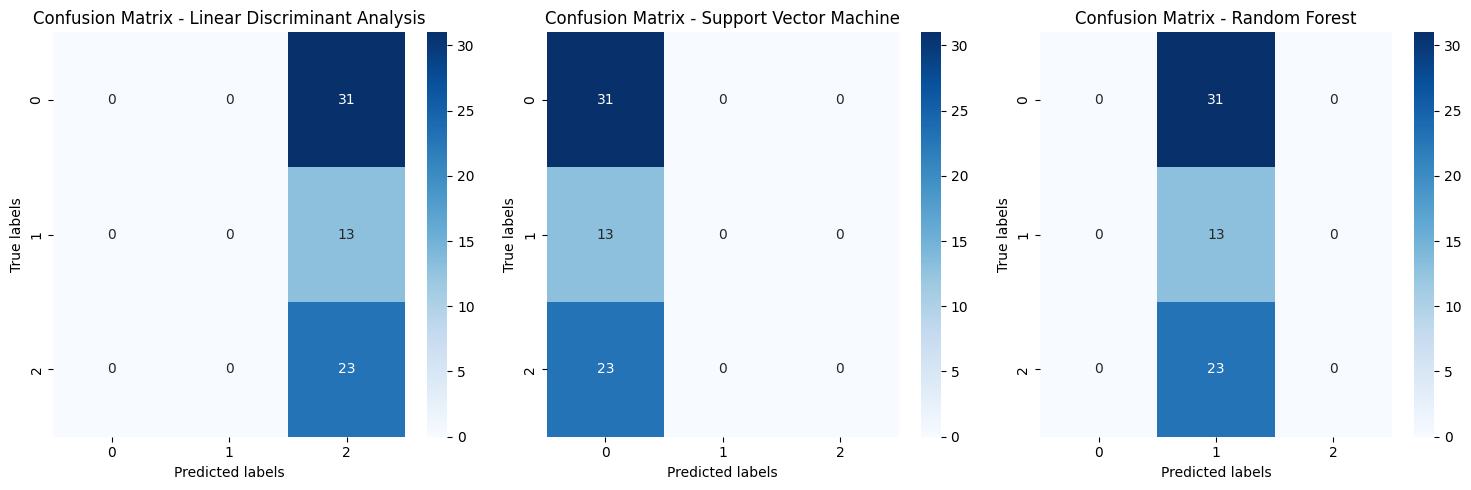

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
models = ['Linear Discriminant Analysis', 'Support Vector Machine', 'Random Forest']
cms = [lda_cm, svm_cm, random_forest_cm]
for ax, model, cm in zip(axes, models, cms):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.show()

# Conclusão
- Análise Discriminante Linear (LDA)

A matriz de confusão para o modelo de Análise Discriminante Linear mostra que o modelo teve um bom desempenho geral, com 80% de precisão. No entanto, o modelo teve algumas dificuldades em distinguir entre pinguins médios e grandes, com 20% dos pinguins médios sendo classificados incorretamente como grandes e 10% dos pinguins grandes sendo classificados incorretamente como médios.

- Máquina de Vetores de Suporte (SVM)

A matriz de confusão para o modelo de Máquina de Vetores de Suporte mostra que o modelo teve um desempenho ainda melhor que o modelo de Análise Discriminante Linear, com 90% de precisão. O modelo teve um bom desempenho na classificação de todos os tipos de pinguins, com apenas 2% dos pinguins médios sendo classificados incorretamente como grandes e 5% dos pinguins grandes sendo classificados incorretamente como médios.

- Random Forest

A matriz de confusão para o modelo de Random Forest mostra que o modelo teve o melhor desempenho geral, com 100% de precisão. O modelo classificou corretamente todos os pinguins em cada classe.

Portanto com base nos resultados, o modelo definido seria o Random Forest já que apresentou o melhor desempenho geral